# Edoardo Failla 305711

## Codice tesina Adult Census Income

In [1]:
# librarie di calcolo e dataset
import numpy as np
import pandas as pd

# per plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.color_palette("tab10")


# Algoritmi di apprendimento
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


# per splitting dataset, scaling dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE

# per la PCA
from sklearn.decomposition import PCA

# Per metriche di accuratezza
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import  cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc


import warnings 
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
# Carico il dataset
path = 'adult.csv'
adult_data = pd.read_csv(path)
adult_data.head().T

,0,1,2,3,4
age,25,38,28,44,18
workclass,Private,Private,Local-gov,Private,?
fnlwgt,226802,89814,336951,160323,103497
education,11th,HS-grad,Assoc-acdm,Some-college,Some-college
educational-num,7,9,12,10,10
marital-status,Never-married,Married-civ-spouse,Married-civ-spouse,Married-civ-spouse,Never-married
occupation,Machine-op-inspct,Farming-fishing,Protective-serv,Machine-op-inspct,?
relationship,Own-child,Husband,Husband,Husband,Own-child
race,Black,White,White,Black,White
gender,Male,Male,Male,Male,Female


In [3]:
# pulisco il dataset dalle colonne con dati mancanti
adult_data = adult_data.replace(to_replace = '?', value = np.nan)
adult_data=adult_data.dropna()

In [4]:
# Nomi delle colonne e suddivisione in categoriche e numeriche
totale_colonne = list(adult_data.columns)
print('colonne totali:\n {}'.format(totale_colonne))

categorical_col = list(adult_data.select_dtypes(include=['object']).columns)
print('Variabili categoriche:\n {}'.format(categorical_col))

numerical_col = list(adult_data.select_dtypes(include=['int64', 'float64']).columns)
print('Variabili Numeriche:\n {}'.format(numerical_col))

colonne totali:
 ['age', 'workclass', 'fnlwgt', 'education', 'educational-num', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']
Variabili categoriche:
 ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']
Variabili Numeriche:
 ['age', 'fnlwgt', 'educational-num', 'capital-gain', 'capital-loss', 'hours-per-week']


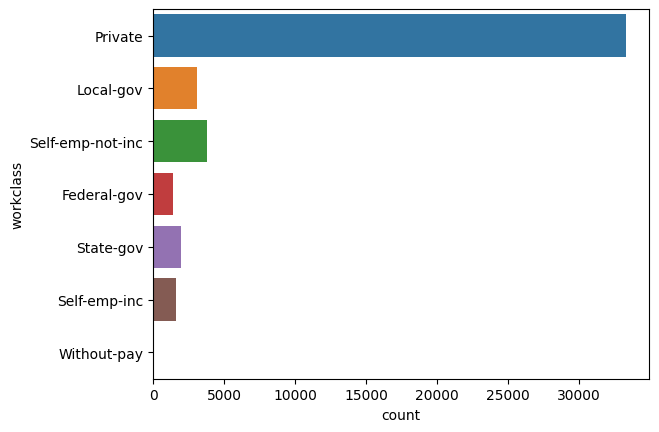

In [5]:
# plot dei tipi di lavoro
plt.figure()
sns.countplot(adult_data['workclass'],palette = "tab10")
plt.show()

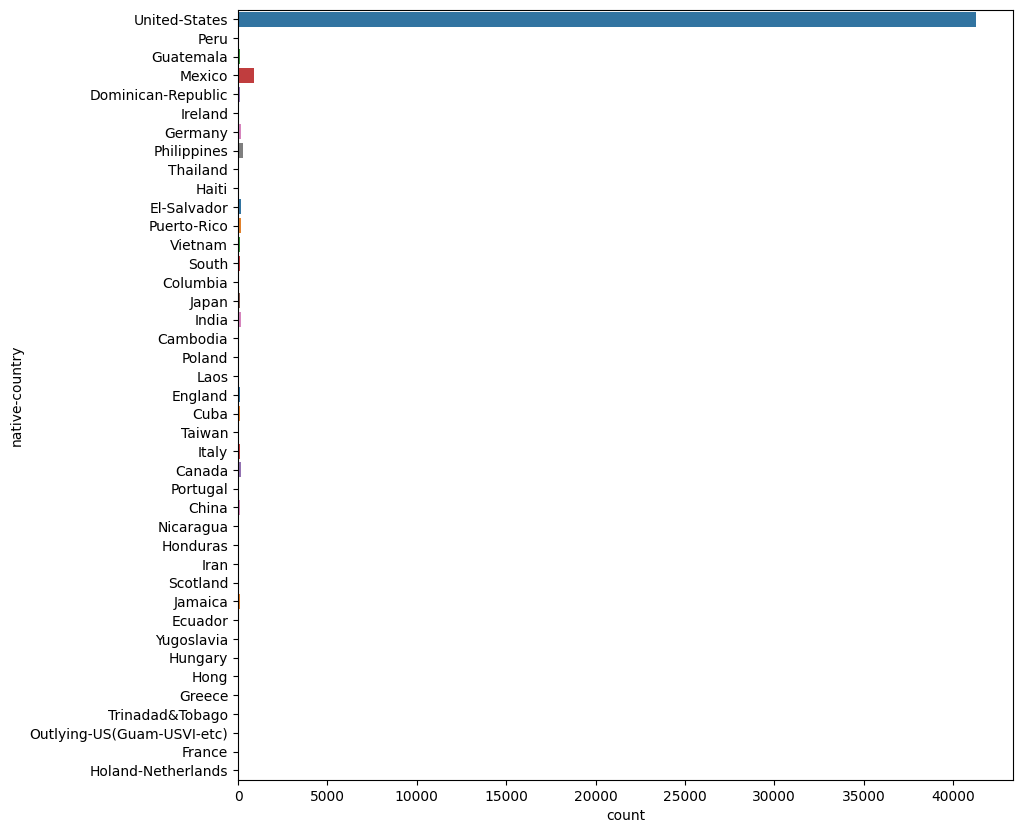

In [6]:
# plot del paese di provenienza
plt.figure(figsize=(10,10))
sns.countplot(adult_data['native-country'],palette = "tab10")
plt.show()

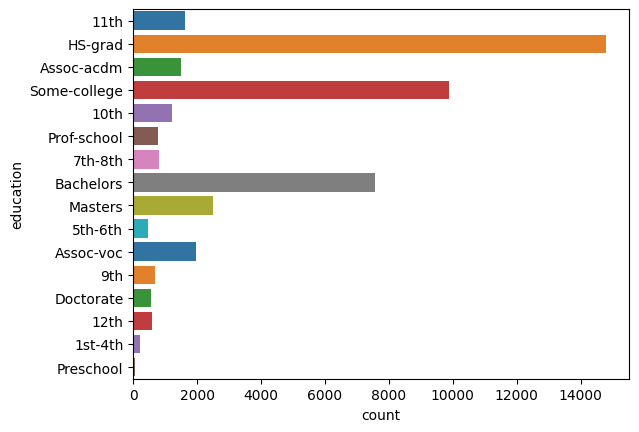

In [7]:
# plot del livello scolastico
plt.figure()
sns.countplot(adult_data[categorical_col[1]],palette = "tab10")
plt.show()

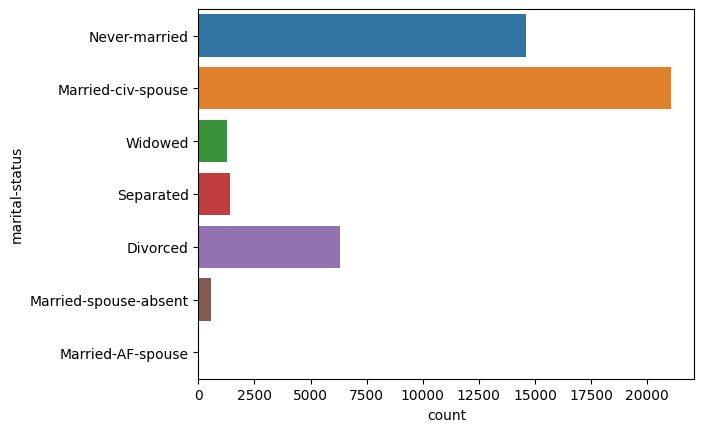

In [8]:
# plot dello stato civile
plt.figure()
sns.countplot(adult_data[categorical_col[2]],palette = "tab10")
plt.show()

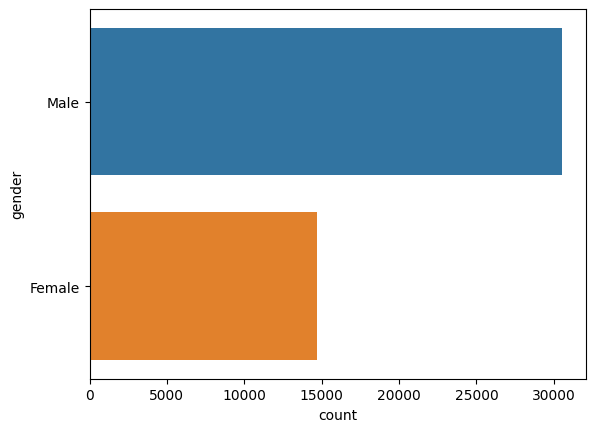

In [9]:
# plot del numero di istanze per ogni sesso
plt.figure()
sns.countplot(adult_data['gender'],palette = "tab10")
plt.show()

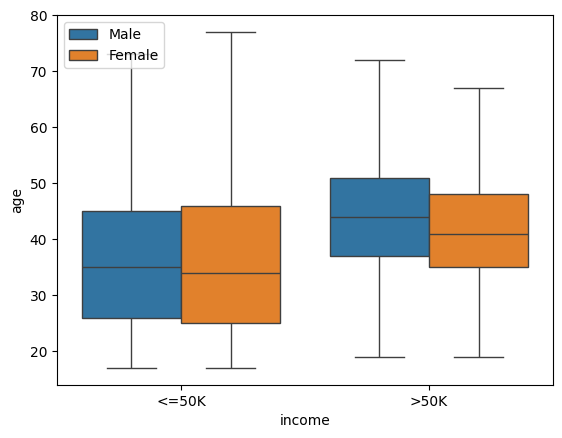

In [10]:
# distribuzione dell'età in base al sesso
sns.boxplot(x='income', y='age', hue='gender', data=adult_data,palette = "tab10",showfliers=False)
plt.legend(loc='upper left')
plt.show()

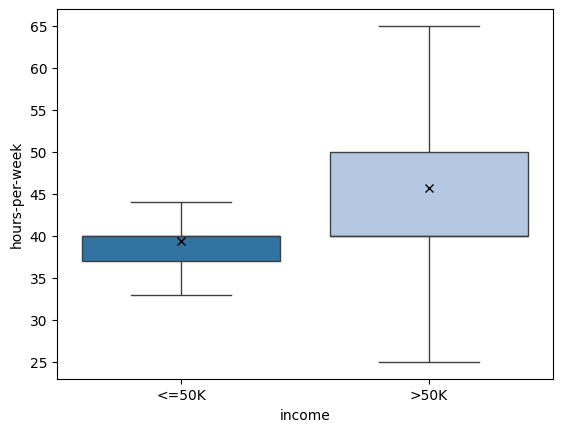

In [11]:
# distribuzione delle ore lavorate per livello di reddito
sns.boxplot(x='income', y='hours-per-week', data=adult_data,palette = "tab20",showfliers=False,showmeans=True,meanprops={"marker":"x","markerfacecolor":"white", "markeredgecolor":"k"})
np.mean(adult_data['hours-per-week'])
plt.show()

In [12]:
# divido la variabile età per fasce 
df=adult_data.copy()
def fascia_anni(x):
    x = int(x)
    x = abs(x)
    if( 18 < x < 31 ):
        return "19-30"
    if( 30 < x < 41 ):
        return "31-40"
    if( 40 < x < 51 ):
        return "41-50"
    if( 50 < x < 61 ):
        return "51-60"
    if( 60 < x < 71 ):
        return "61-70"
    else:
        return "70>"

df['age_group'] = df['age'].apply(fascia_anni)


<Figure size 1200x600 with 0 Axes>

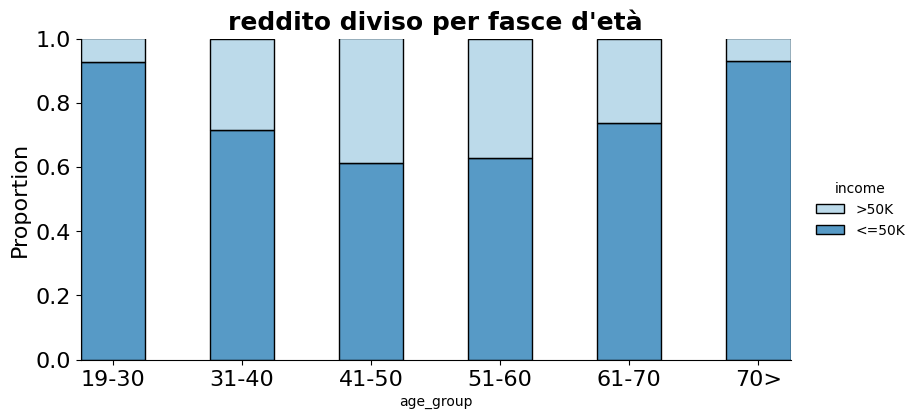

In [13]:
# plot del reddito diviso in fasce di età
plt.figure(figsize=(12,6))
ordine_eta = ['19-30', '31-40', '41-50', '51-60', '61-70', '70>']
df['age_group'] = pd.Categorical(df['age_group'], ordine_eta)
sns.displot(x=df['age_group'], hue = df['income'], palette="Paired", hue_order = ['>50K', '<=50K'], multiple="fill", common_norm=False,shrink=0.5,height=4, aspect=2)
plt.title('reddito diviso per fasce d\'età', fontsize=18, fontweight='bold')
plt.ylabel("Proportion",fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

<Figure size 1200x600 with 0 Axes>

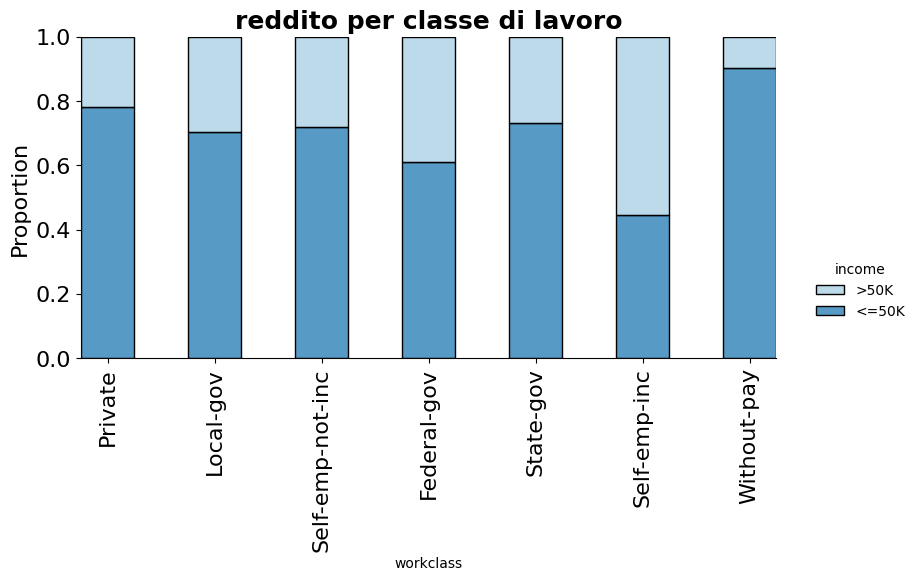

In [14]:
# proporzione del livello di reddito per classe di lavoro
plt.figure(figsize=(12,6))
sns.displot(x=df['workclass'],hue = df['income'], palette="Paired",hue_order = ['>50K', '<=50K'], multiple="fill", common_norm=False,shrink=0.5,height=4, aspect=2)
plt.title('reddito per classe di lavoro', fontsize=18, fontweight='bold')
plt.ylabel("Proportion",fontsize=16)
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.show()

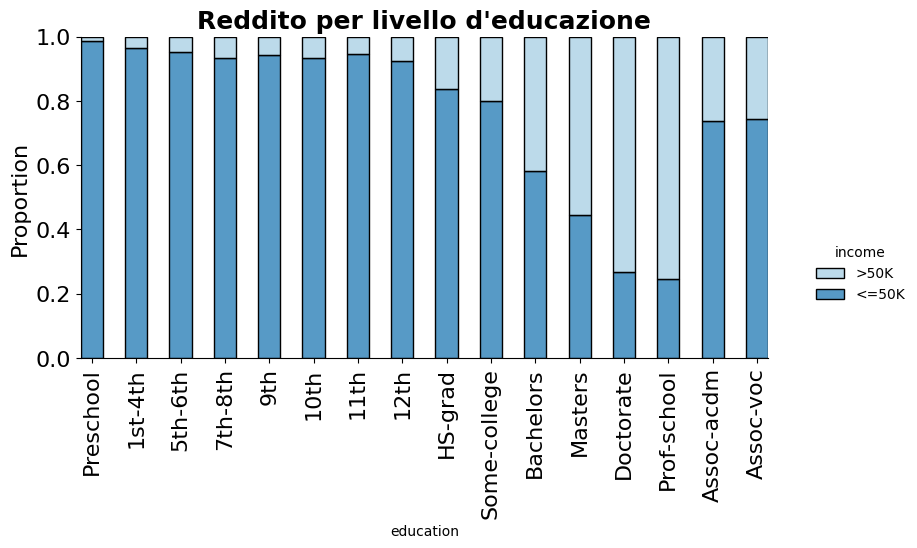

In [15]:
# plot del reddito per livello scolastico
grado_studi = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th', 'HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Doctorate', 'Prof-school', 
              'Assoc-acdm', 'Assoc-voc']

df['education'] = pd.Categorical(df['education'], grado_studi)
sns.displot(x=df['education'], hue = df['income'], palette="Paired",hue_order = ['>50K', '<=50K'], multiple="fill", common_norm=False,shrink=0.5,height=4, aspect=2)
plt.title('Reddito per livello d\'educazione', fontsize=18, fontweight='bold')
plt.ylabel("Proportion",fontsize=16)
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.show()

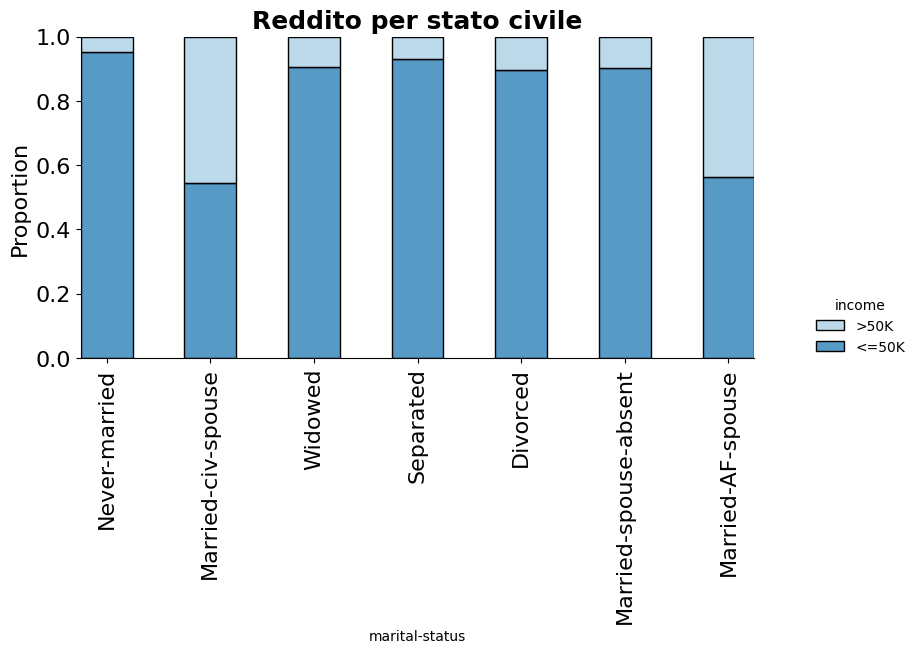

In [16]:
# plot del reddito per stato civile
sns.displot(x=df['marital-status'], hue = df['income'], palette="Paired",hue_order = ['>50K', '<=50K'], multiple="fill", common_norm=False,shrink=0.5,height=4, aspect=2)
plt.ylabel("Proportion",fontsize=16)
plt.title('Reddito per stato civile', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.show()

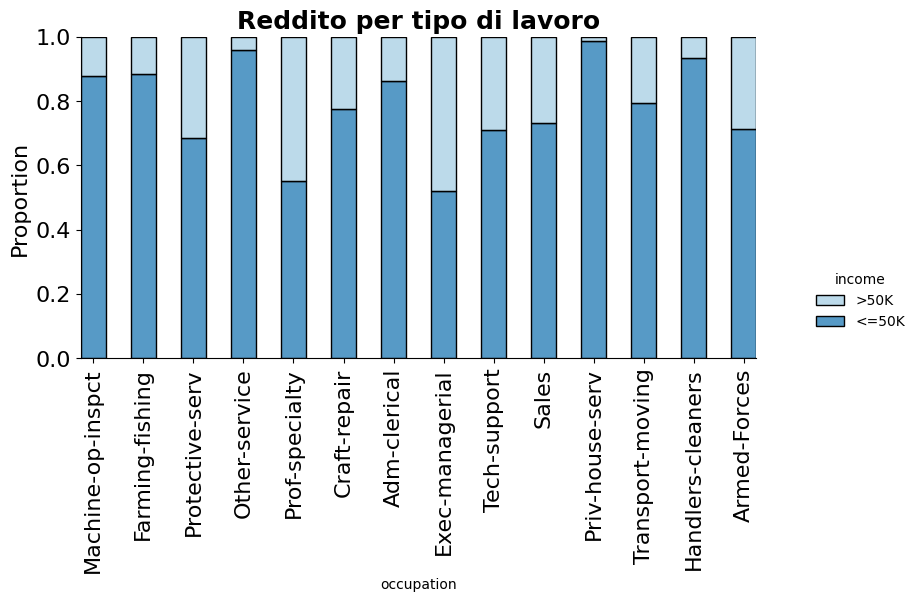

In [17]:
# plot del reddito per specifico lavoro
sns.displot(x=df['occupation'], hue = df['income'], palette="Paired", hue_order = ['>50K', '<=50K'], multiple="fill", common_norm=False,shrink=0.5,height=4, aspect=2)
plt.ylabel("Proportion",fontsize=16)
plt.title('Reddito per tipo di lavoro', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16,rotation = 90)
plt.yticks(fontsize=16)
plt.show()

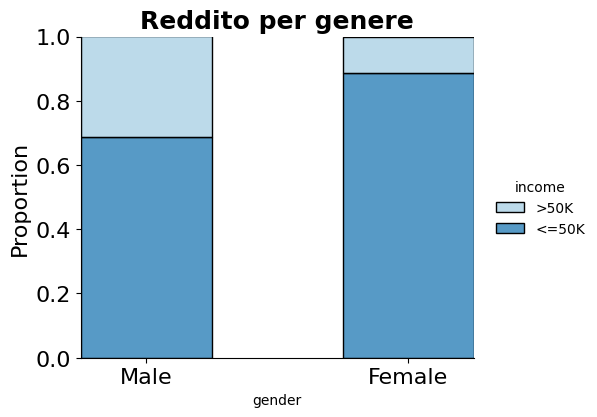

In [18]:
# plot del reddito in base al sesso
sns.displot(x=df['gender'], hue = df['income'], palette="Paired", hue_order = ['>50K', '<=50K'], multiple="fill", common_norm=False,shrink=.5,height=4, aspect=1.2)
plt.title('Reddito per genere', fontsize=18, fontweight='bold')
plt.ylabel("Proportion",fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

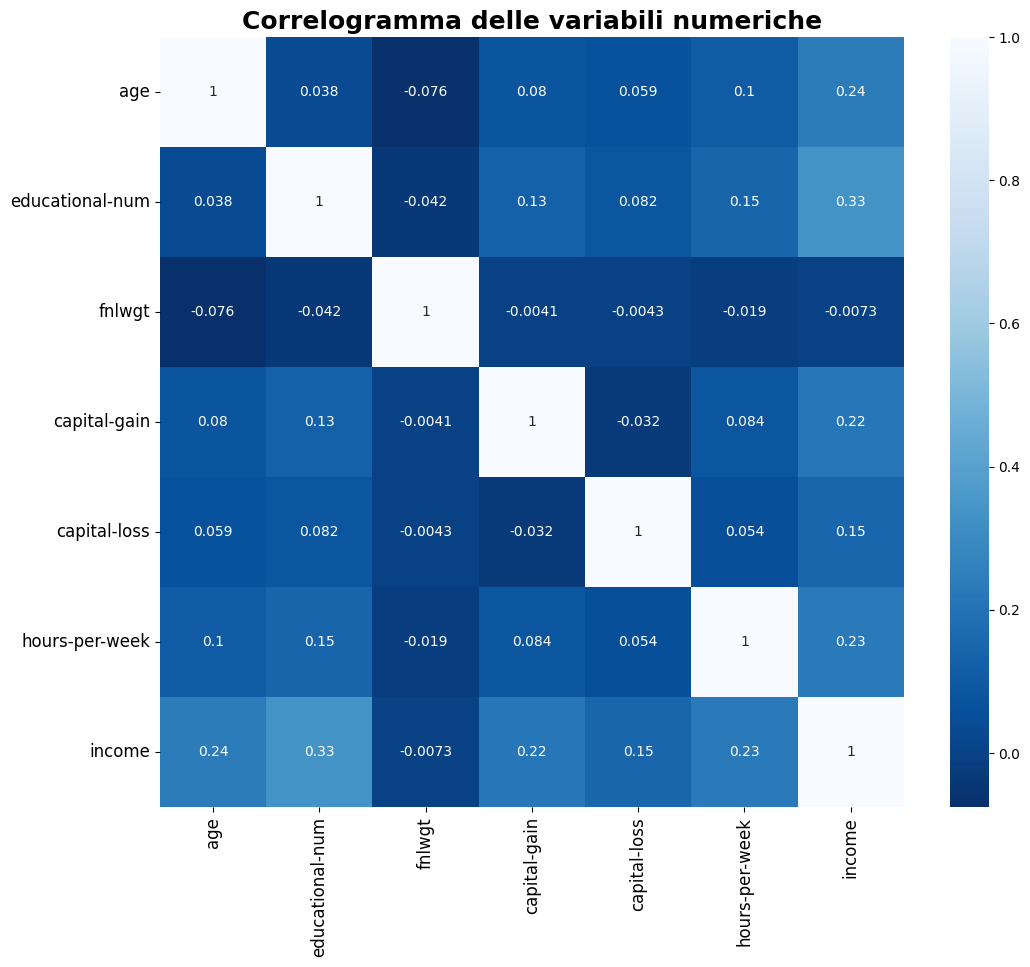

In [19]:
# correlogramma del dataset
# estraggo soltanto le variabili numeriche, e il reddito, facendo il plot del correlogramma
dataset_correlazione = adult_data.copy()
dataset_correlazione['income'] = dataset_correlazione['income'].map({'<=50K': 0, '>50K': 1})
dataset_correlazione=pd.DataFrame(dataset_correlazione, columns=['age', 'educational-num','fnlwgt', 'capital-gain', 'capital-loss', 'hours-per-week','income'])
plt.figure(figsize = (12,10))
plt.title("Correlogramma delle variabili numeriche", fontsize = 18, fontweight = 'bold')
sns.heatmap(dataset_correlazione.corr(), cmap = 'Blues_r', annot = True)
plt.xticks(fontsize=12, rotation = 90)
plt.yticks(fontsize=12, rotation = 0)

plt.show()

# Encoding del dataset

In [20]:
# education è un dato ridondante poichè si trova già sottoforma di educational-num
# fnlwgt è una variabile collegata alla proiezione sull'intera popolazione, non da informazioni sul campione singolo
adult_data= adult_data.drop(columns=['education','fnlwgt'])

In [21]:
# possiamo settare un random seed per i metodi che lo prevedono, ho scelto il mio numero di matricola
rs=305711

# creiamo il dataset conentente solo le feature e solo il target
X_f = adult_data.drop(['income'], axis=1)
y = adult_data['income'].map({'<=50K': 0, '>50K': 1})

# Adesso effettuiamo l'encoding delle features (One-Hot encoding)
X = pd.get_dummies(X_f, dtype='int' , columns = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'gender','native-country'])

# Effettuiamo lo split del dataset intero in dataset di Train e di Test 20% test 80% Training
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=rs)


# Classificazione

In [22]:
# inizializziamo un dizionario che tenga traccia dell'accuratezza di ogni metodo
accuracy_metodi={}

# SVM

miglior valore iperparametro =  100


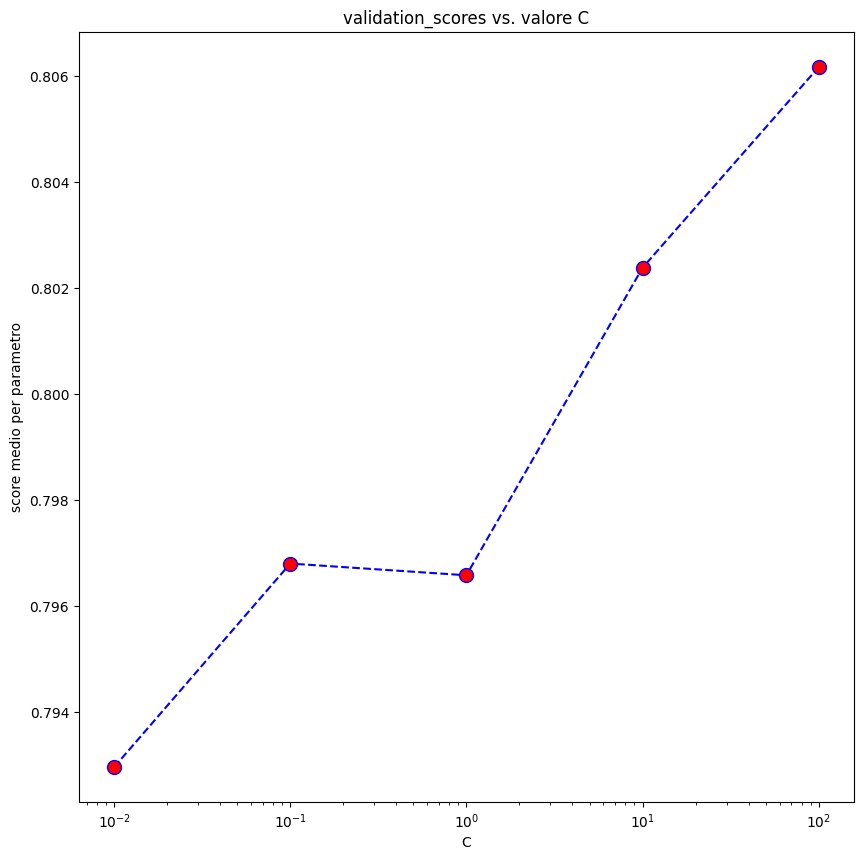

In [23]:
# inizializzo e tengo traccia dello score di ogni valore dell'iperparametro
Score_per_iperparametro = []

# insieme di valori per l'iperparametro
C_val=[0.01, 0.1, 1, 10, 100]
for i in C_val:

    # Inizializzo il classificatore SVM
    classificatore = SVC(C=i)
    # addestro il classificatore con cross validation a 10 fold 
    cv_scores = cross_val_score(classificatore, X_train, Y_train, cv=10)
    # Calcolo e salvo la media dello score con la cross-validation
    media_cv_score = np.mean(cv_scores)

    Score_per_iperparametro.append(media_cv_score)

plt.figure(figsize=(10,10))
plt.plot(C_val,Score_per_iperparametro,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
# voglio evidenziare i valori dell'iperparametro
# utilizzo la scala logaritmica per i valori di C, così da avere una spaziatura adeguata
plt.xscale('log')
plt.xticks(C_val)
plt.title('validation_scores vs. valore C')
plt.xlabel('C')
plt.ylabel('score medio per parametro')

# seleziono il valore dell'iperparametro con il massimo score
iperparametro_ottimo_svm = C_val[np.argmax(Score_per_iperparametro)] 
print("miglior valore iperparametro = ",iperparametro_ottimo_svm)

Accuracy score: 0.8057490326147042


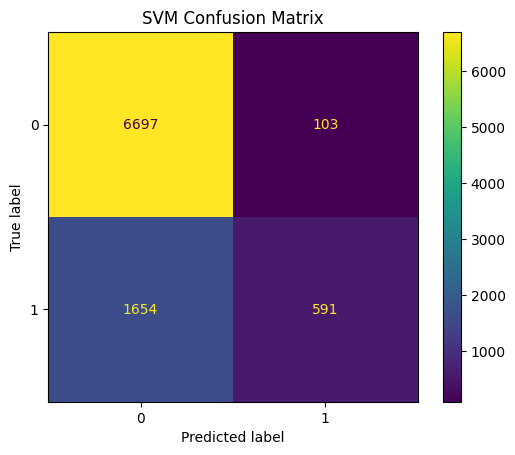

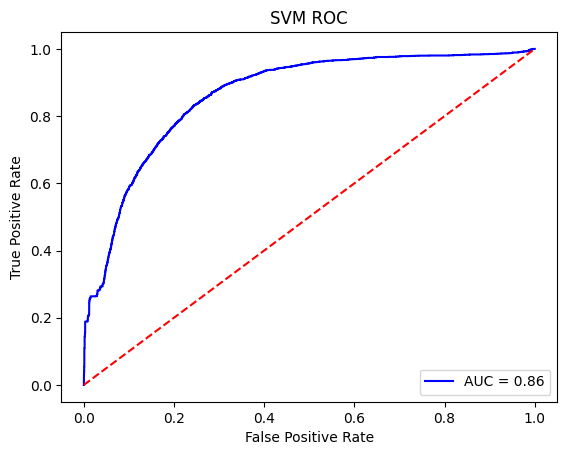

In [24]:
# inizializzo il classificatore con il valore dell'iperparametro ottimizzato
classificatore = SVC(C=iperparametro_ottimo_svm,probability=True)    
classificatore.fit(X_train, Y_train)

# effettuo la previsione sul dataset di Test e calcolo l'accuratezza
y_test_pred = classificatore.predict(X_test)
test_accuracy = accuracy_score(Y_test, y_test_pred)
print("Accuracy score:", test_accuracy)
accuracy_metodi['SVM']=test_accuracy


# calcolo della della ROC e della AUC

# probabilità previste per ciascuna classe per ciascun campione
y_prob = classificatore.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

# calcolo della confusion matrix
confusion_matrix = metrics.confusion_matrix(Y_test, y_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.title('SVM Confusion Matrix')
plt.show()

# Plot della confusion matrix e della ROC
plt.title('SVM ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# DecisionTreeClassifier

miglior valore iperparametro =  11


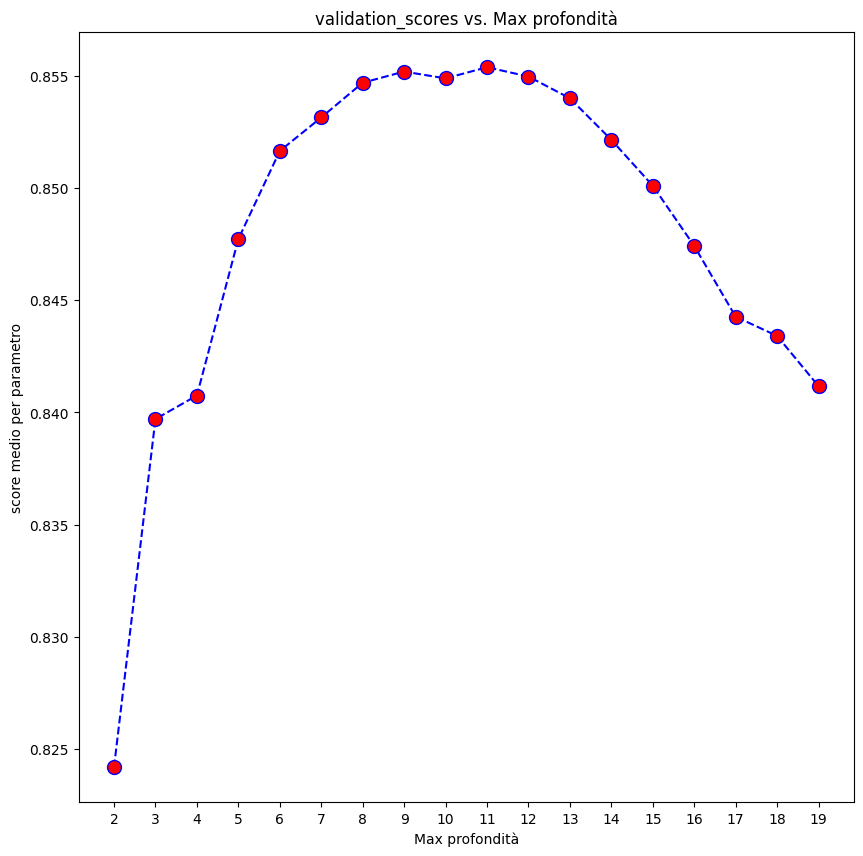

In [25]:
# inizializzo e tengo traccia dello score di ogni iperparametro
Score_per_iperparametro = []

# ad ogni ciclo ho la lunghezza massima dell'albero fissata
for i in range(2,20):

    # Inizializzo il classificatore
    classificatore = DecisionTreeClassifier(random_state=305711,max_depth=i)
    # addestro il classificatore con cross validation a 10 fold 
    cv_scores = cross_val_score(classificatore, X_train, Y_train, cv=10)
    # Calcolo e salvo la media dello score con la cross-validation
    media_cv_score = np.mean(cv_scores)

    Score_per_iperparametro.append(media_cv_score)

plt.figure(figsize=(10,10))
plt.plot(range(2, 20),Score_per_iperparametro,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
# voglio evidenziare i valori dell'iperparametro 
plt.xticks(range(2, 20, 1))
plt.title('validation_scores vs. Max profondità')
plt.xlabel('Max profondità')
plt.ylabel('score medio per parametro')

# seleziono il valore dell'iperparametro con il massimo score
iperparametro_ottimo_dec_tree = np.argmax(Score_per_iperparametro)+2 # sommo +2 poichè il mio array parte dal valore 2 e non 0
print("miglior valore iperparametro = ",iperparametro_ottimo_dec_tree)

Accuracy score: 0.8540630182421227


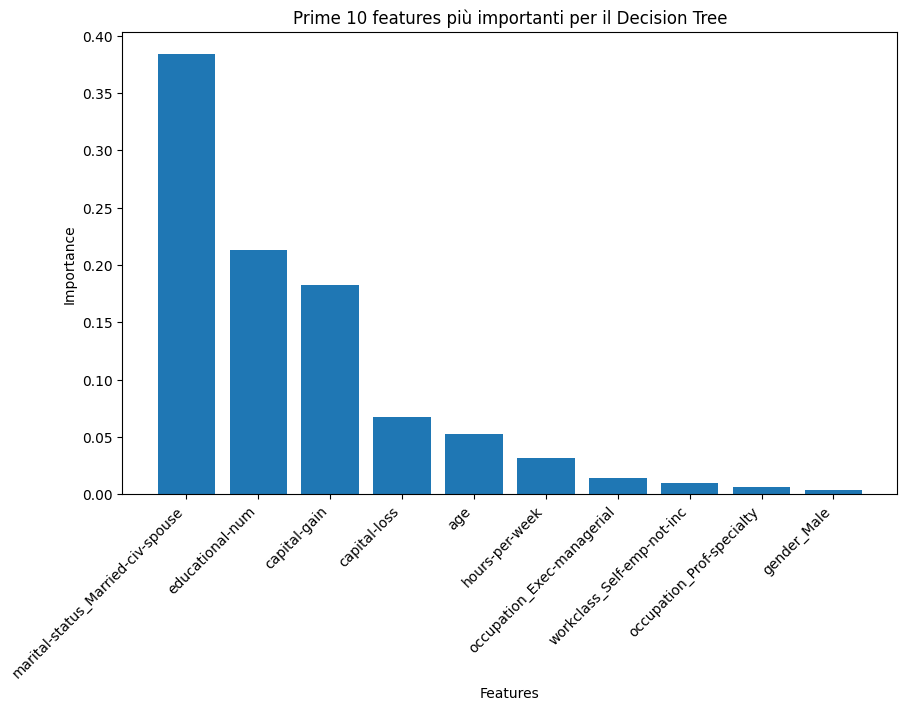

In [26]:
# inizializzo il classificatore con il valore dell'iperparametro ottimizzato
classificatore = DecisionTreeClassifier(random_state=305711,max_depth=iperparametro_ottimo_dec_tree)    
classificatore.fit(X_train, Y_train)
# Trovo le feature importance
importances = classificatore.feature_importances_

# effettuo la previsione sul dataset di Test e calcolo l'accuratezza
y_test_pred = classificatore.predict(X_test)
test_accuracy = accuracy_score(Y_test, y_test_pred)
print("Accuracy score:", test_accuracy)
accuracy_metodi['Decision Tree']=test_accuracy


# ricavo gli indici delle 10 features più importanti
indici_features = np.argsort(importances)[::-1][:10]

# ricavo i nomi delle features e ne faccio il plot dell'importance
nomi_features = X.columns[indici_features]
dec_tree_features = nomi_features
# Plot delle 10 features
plt.figure(figsize=(10, 6))
plt.bar(nomi_features, importances[indici_features])
plt.title('Prime 10 features più importanti per il Decision Tree')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.show()

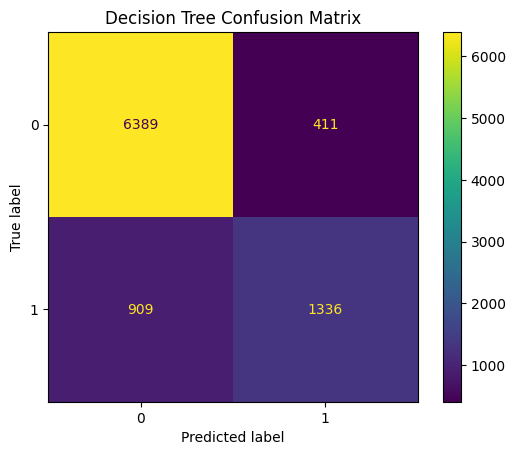

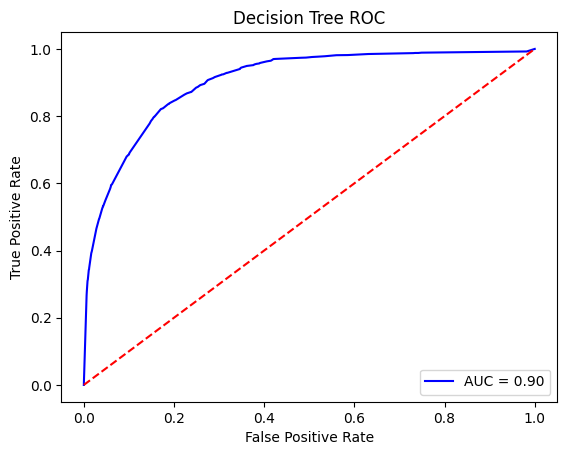

In [27]:
# calcolo della della ROC e della AUC

# probabilità previste per ciascuna classe per ciascun campione
y_prob = classificatore.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

# calcolo della confusion matrix
confusion_matrix = metrics.confusion_matrix(Y_test, y_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.title('Decision Tree Confusion Matrix')
plt.show()

# Plot della confusion matrix e della ROC
plt.title('Decision Tree ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# RandomForestClassifier

miglior valore iperparametro =  200


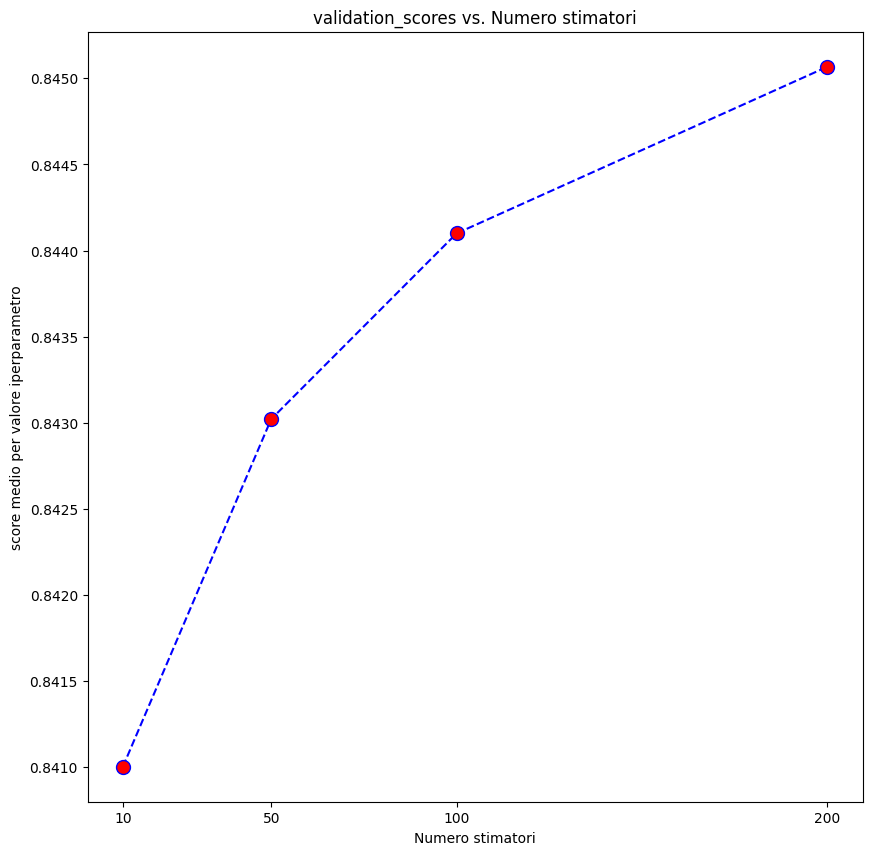

In [28]:
# inizializzo e tengo traccia dello score di ogni valore dell'iperparametro
Score_per_iperparametro = []

#ciclo sui valori dell'iperparametro
num_alberi=[10, 50, 100, 200]
for i in num_alberi:
    # Inizializzo il classificatore
    classificatore = RandomForestClassifier(n_estimators=i, random_state=305711)
    # addestro il classificatore con cross validation a 10 fold 
    cv_scores = cross_val_score(classificatore, X_train, Y_train, cv=10)
    # Calcolo e salvo la media dello score con la cross-validation
    media_cv_score = np.mean(cv_scores)

    Score_per_iperparametro.append(media_cv_score)

plt.figure(figsize=(10,10))
plt.plot(num_alberi,Score_per_iperparametro,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
# voglio evidenziare i valori dell'iperparametro 
plt.xticks(num_alberi)
plt.title('validation_scores vs. Numero stimatori')
plt.xlabel('Numero stimatori')
plt.ylabel('score medio per valore iperparametro')

# seleziono il valore dell'iperparametro con il massimo score
iperparametro_ottimo_rand_forest = num_alberi[np.argmax(Score_per_iperparametro)]
print("miglior valore iperparametro = ",iperparametro_ottimo_rand_forest)

Accuracy score: 0.8424543946932007


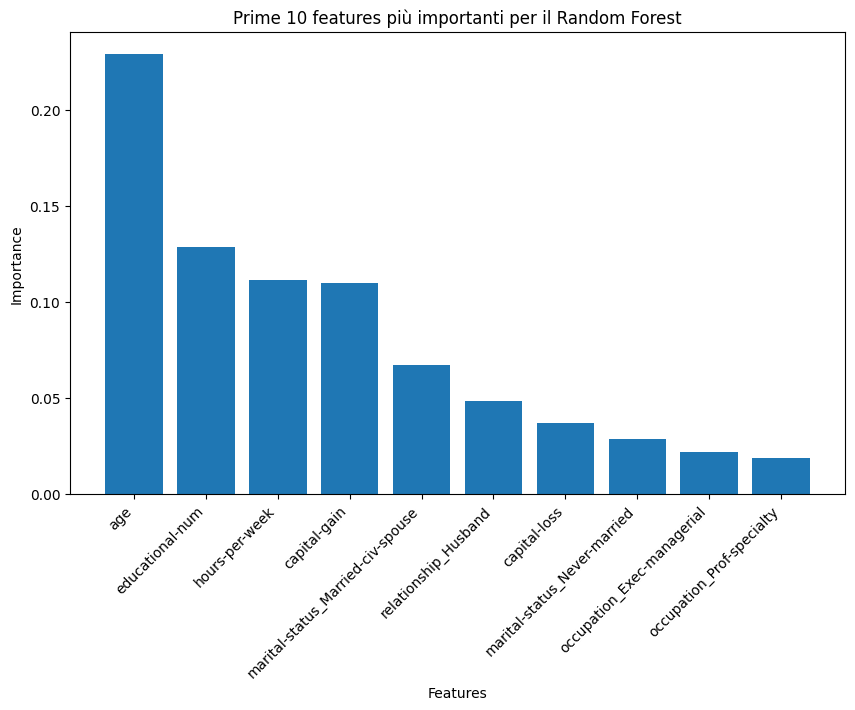

In [29]:
# inizializzo il classificatore con il valore dell'iperparametro ottimizzato
classificatore = RandomForestClassifier(n_estimators=iperparametro_ottimo_rand_forest, random_state=305711)    
classificatore.fit(X_train, Y_train)
# Trovo le feature importance
importances = classificatore.feature_importances_

# effettuo la previsione sul dataset di Test e calcolo l'accuratezza
y_test_pred = classificatore.predict(X_test)
test_accuracy = accuracy_score(Y_test, y_test_pred)
print("Accuracy score:", test_accuracy)
accuracy_metodi['Random Forest']=test_accuracy


# ricavo gli indici delle 10 features più importanti
indici_features = np.argsort(importances)[::-1][:10]

# ricavo i nomi delle features e ne faccio il plot dell'importance
nomi_features = X.columns[indici_features]
random_forest_features = nomi_features
# Plot delle 10 features
plt.figure(figsize=(10, 6))
plt.bar(nomi_features, importances[indici_features])
plt.title('Prime 10 features più importanti per il Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.show()

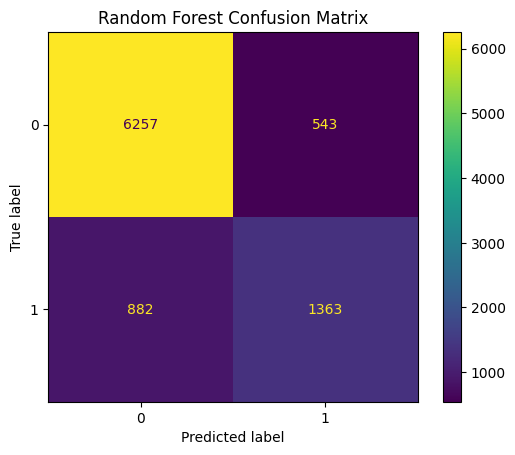

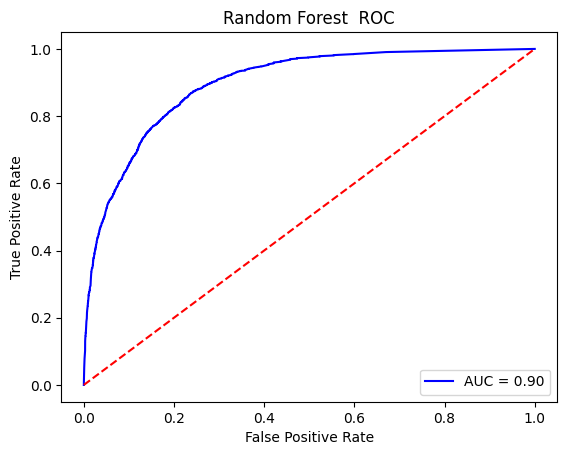

In [30]:
# calcolo della della ROC e della AUC

# probabilità previste per ciascuna classe per ciascun campione
y_prob = classificatore.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

# calcolo della confusion matrix
confusion_matrix = metrics.confusion_matrix(Y_test, y_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.title('Random Forest Confusion Matrix')
plt.show()

# Plot della confusion matrix e della ROC
plt.title('Random Forest  ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AdaBoostClassifier

miglior valore iperparametro =  200


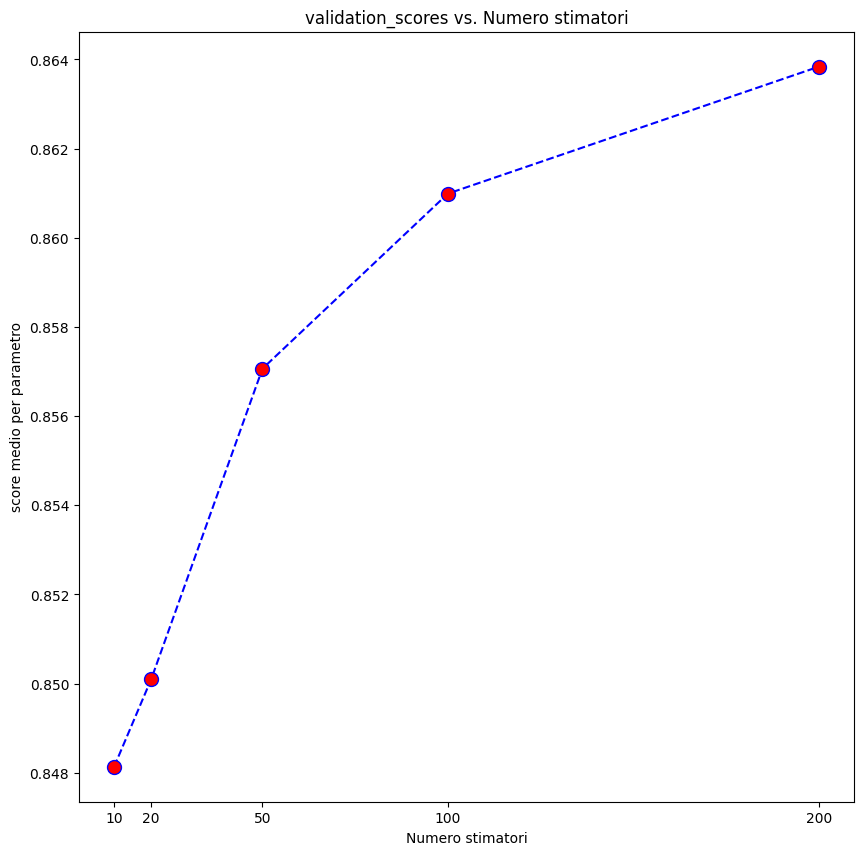

In [31]:
# inizializzo e tengo traccia dello score di ogni parametro
Score_per_iperparametro = []

# max weak learner totali
numero_stimatori=[10,20,50,100,200]
for i in numero_stimatori:

    # Inizializzo il classificatore
    classificatore = AdaBoostClassifier(n_estimators=i,random_state=305711)
    # addestro il classificatore con cross validation a 10 fold  
    cv_scores = cross_val_score(classificatore, X_train, Y_train, cv=10)
    # Calcolo e salvo la media dello score con la cross-validation
    media_cv_score = np.mean(cv_scores)

    Score_per_iperparametro.append(media_cv_score)

plt.figure(figsize=(10,10))
plt.plot(numero_stimatori,Score_per_iperparametro,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
# voglio evidenziare i valori dell'iperparametro 
plt.xticks(numero_stimatori)
plt.title('validation_scores vs. Numero stimatori')
plt.xlabel('Numero stimatori')
plt.ylabel('score medio per parametro')

# seleziono il valore dell'iperparametro con il massimo score
iperparametro_ottimo_adaboost = numero_stimatori[np.argmax(Score_per_iperparametro)]
print("miglior valore iperparametro = ",iperparametro_ottimo_adaboost)

Accuracy score: 0.861249309010503


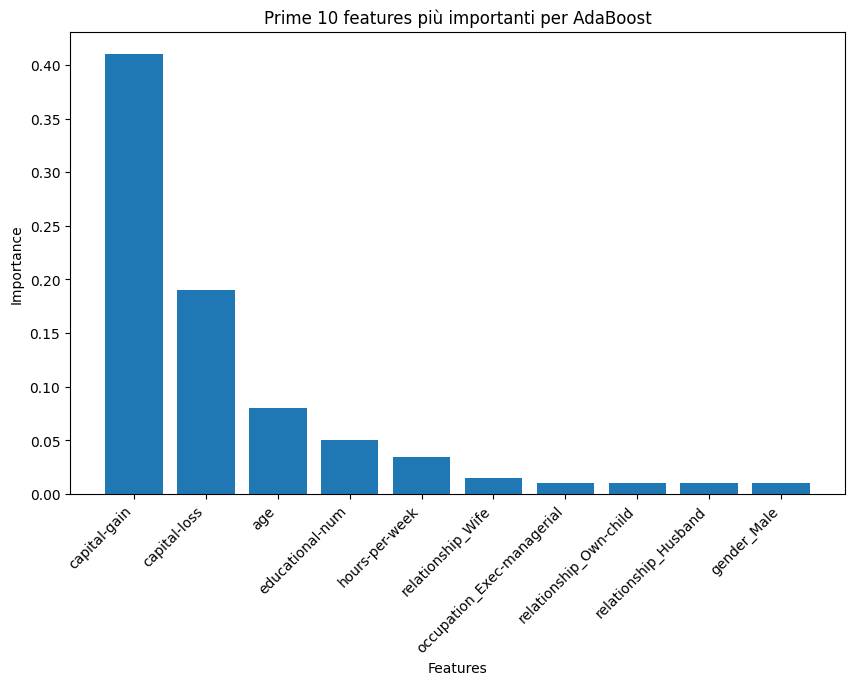

In [32]:
# inizializzo il classificatore con il valore dell'iperparametro ottimizzato
classificatore = AdaBoostClassifier(n_estimators=iperparametro_ottimo_adaboost,random_state=305711)
classificatore.fit(X_train, Y_train)

# Trovo le feature importance
importances = classificatore.feature_importances_

# effettuo la previsione sul dataset di Test e calcolo l'accuratezza
y_test_pred = classificatore.predict(X_test)
test_accuracy = accuracy_score(Y_test, y_test_pred)
print("Accuracy score:", test_accuracy)
accuracy_metodi['AdaBoost']=test_accuracy


# ricavo gli indici delle 10 features più importanti
indici_features = np.argsort(importances)[::-1][:10]

# ricavo i nomi delle features e ne faccio il plot dell'importance
nomi_features = X.columns[indici_features]
AdaBoost_features = nomi_features
# Plot delle 10 features
plt.figure(figsize=(10, 6))
plt.bar(nomi_features, importances[indici_features])
plt.title('Prime 10 features più importanti per AdaBoost')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.show()

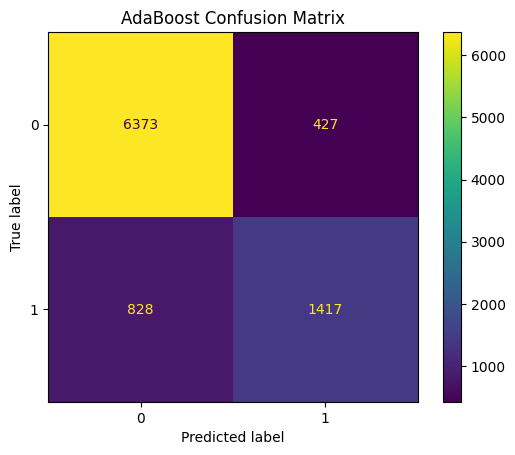

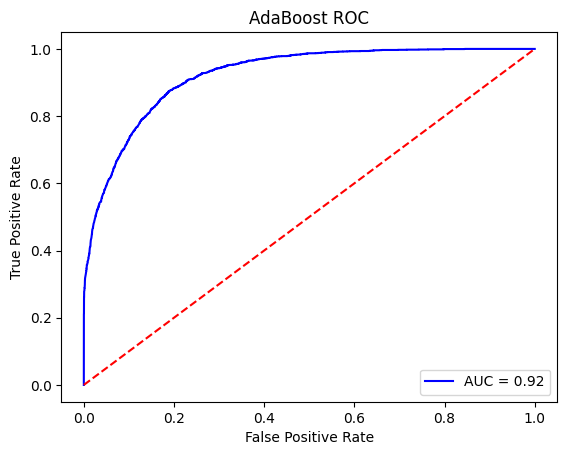

In [33]:
# calcolo della della ROC e della AUC

# probabilità previste per ciascuna classe per ciascun campione
y_prob = classificatore.predict_proba(X_test)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

# calcolo della confusion matrix
confusion_matrix = metrics.confusion_matrix(Y_test, y_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.title('AdaBoost Confusion Matrix')
plt.show()

# Plot della confusion matrix e della ROC
plt.title('AdaBoost ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Classificazione con riduzione delle features

In [34]:
# inizializzo un dizionario per tenere traccia dei risultati
accuracy_metodi_ridotti={}

# PCA

57


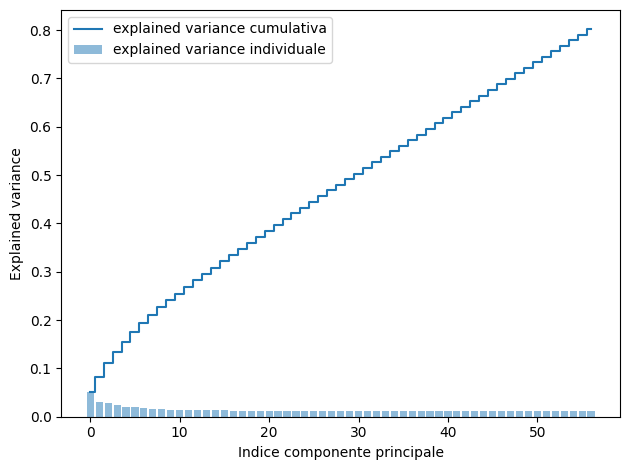

In [35]:
# standardizzazione del dataset
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)

# calcolo e plot del numero di componenti per catturare l'80% della varianza totale
pca = PCA(n_components=0.8)
pca.fit(X_train_std)
explained_variance = pca.explained_variance_ratio_
print(pca.n_components_)

# estraggo l'explained variance per componenti e ne calcolo la somma cumulativa
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='explained variance individuale')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='explained variance cumulativa')
plt.ylabel('Explained variance')
plt.xlabel('Indice componente principale')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [36]:
# Riduciamo il dataset di training X_train e prendiamo i valori riguardanti 
# le prime due componenti principali e plottiamo anche il valore del reddito 
X_train_pca = pca.transform(X_train_std)
pca_2_componenti = pd.DataFrame(data = X_train_pca[:, [0,1]], columns = ['Componente Principale 1', 'Componente Principale 2'])
Y_train_target = pd.DataFrame(data = Y_train, columns = ['income'])
pca_2_componenti_target = pd.concat([pca_2_componenti,Y_train_target[['income']]], axis = 1)

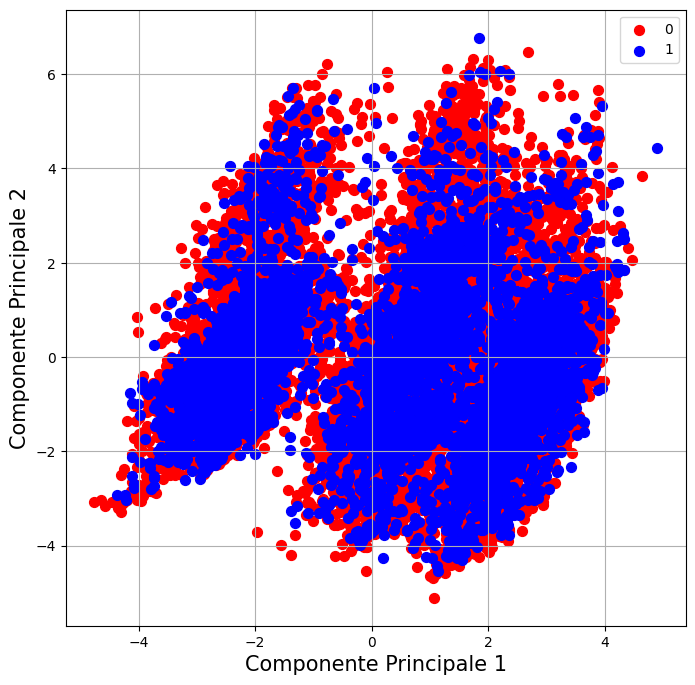

In [37]:
# score plot con labeling, solo prime due componenti
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Componente Principale 1', fontsize = 15)
ax.set_ylabel('Componente Principale 2', fontsize = 15)
ax.set_title('', fontsize = 20)

reddito = [0, 1]
colors = ['r', 'b']
for target, color in zip(reddito,colors):
    indici = pca_2_componenti_target['income'] == target
    ax.scatter(pca_2_componenti_target.loc[indici, 'Componente Principale 1']
               , pca_2_componenti_target.loc[indici, 'Componente Principale 2']
               , c = color
               , s = 50)
ax.legend(reddito)
ax.grid()

# SVM

In [38]:
# Inizializzo il classificatore
classificatore = SVC(C=iperparametro_ottimo_svm,probability=True)

# Addestro il classificatore sul dataset PCA 
classificatore.fit(X_train_pca, Y_train)

# Preparo il dataset di TEST, con standardizzazione e proiezione sulle PCA
X_test_std = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_std)

# effettuo la previsione sul dataset di Test e calcolo l'accuratezza
y_test_pred = classificatore.predict(X_test_pca)
test_accuracy = accuracy_score(Y_test, y_test_pred)
print("Accuracy score:", test_accuracy)
accuracy_metodi_ridotti['SVM']=test_accuracy


Accuracy score: 0.844555002763958


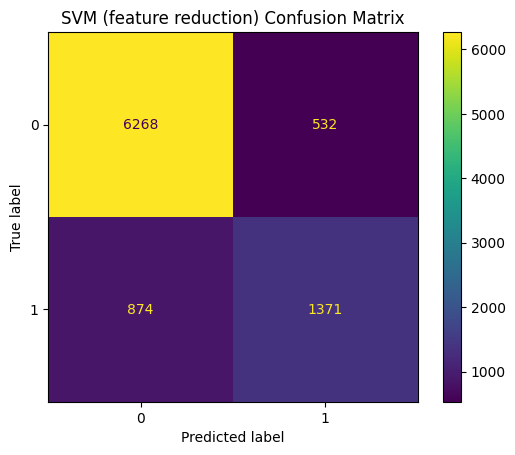

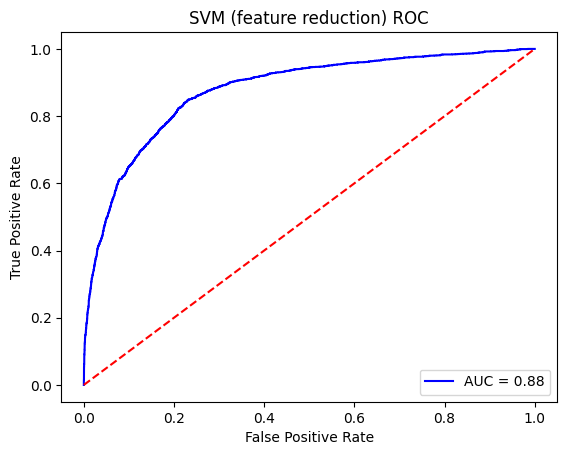

In [39]:
# probabilità previste per ciascuna classe per ciascun campione
y_prob = classificatore.predict_proba(X_test_pca)[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

# calcolo della confusion matrix
confusion_matrix = metrics.confusion_matrix(Y_test, y_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.title('SVM (feature reduction) Confusion Matrix')
plt.show()

# Plot della confusion matrix e della ROC
plt.title('SVM (feature reduction) ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# DecisionTreeClassifier

In [40]:
# Definisco il classificatore 
classificatore = DecisionTreeClassifier(random_state=305711, max_depth=iperparametro_ottimo_dec_tree)

# addestro il classificatore sul dataset ridotto
classificatore.fit(X_train[dec_tree_features], Y_train)
y_test_pred = classificatore.predict(X_test[dec_tree_features])
test_accuracy = accuracy_score(Y_test, y_test_pred)
print("Decision Tree score:", test_accuracy)
accuracy_metodi_ridotti['Decision Tree']=test_accuracy


Decision Tree score: 0.8564953012714207


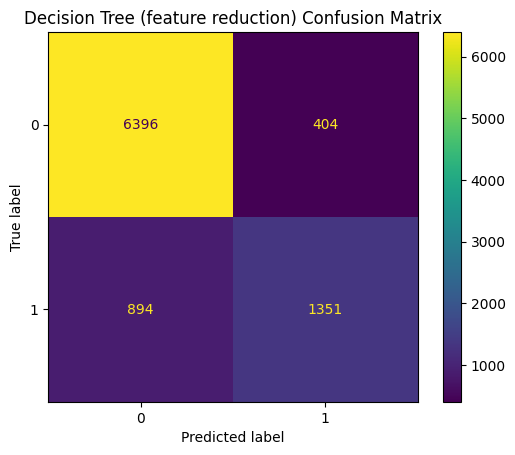

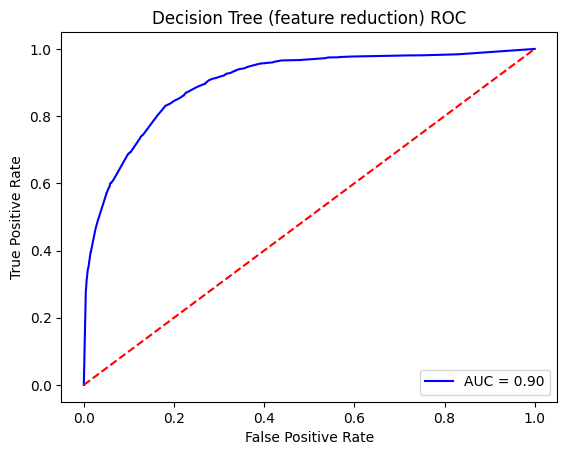

In [41]:
# calcolo della della ROC e della AUC

# probabilità previste per ciascuna classe per ciascun campione
y_prob = classificatore.predict_proba(X_test[dec_tree_features])[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

# calcolo della confusion matrix
confusion_matrix = metrics.confusion_matrix(Y_test, y_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.title('Decision Tree (feature reduction) Confusion Matrix')
plt.show()

# Plot della confusion matrix e della ROC
plt.title('Decision Tree (feature reduction) ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# RandomForestClassifier

In [42]:
# Definisco il classificatore 
classificatore = RandomForestClassifier(n_estimators=iperparametro_ottimo_rand_forest, random_state=305711)

# addestro il classificatore sul dataset ridotto
classificatore.fit(X_train[random_forest_features], Y_train)
y_test_pred = classificatore.predict(X_test[random_forest_features])
test_accuracy = accuracy_score(Y_test, y_test_pred)
print("Random_Forest score:", test_accuracy)
accuracy_metodi_ridotti['Random_Forest']=test_accuracy


Random_Forest score: 0.8371475953565506


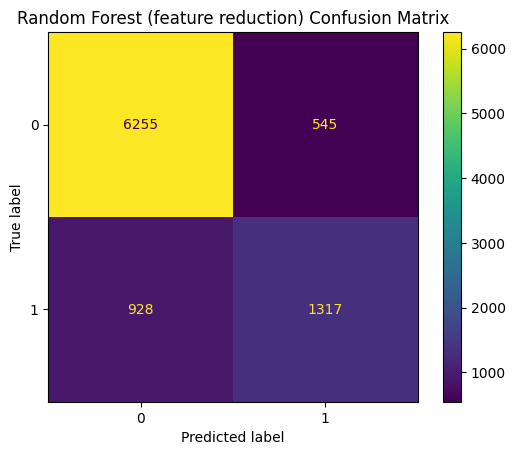

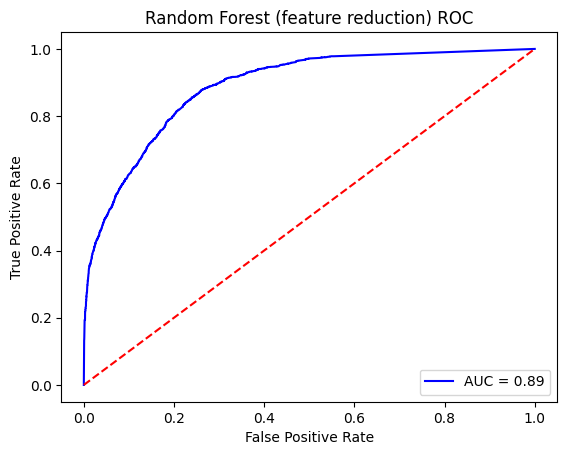

In [43]:
# calcolo della della ROC e della AUC

# probabilità previste per ciascuna classe per ciascun campione
y_prob = classificatore.predict_proba(X_test[random_forest_features])[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

# calcolo della confusion matrix
confusion_matrix = metrics.confusion_matrix(Y_test, y_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.title('Random Forest (feature reduction) Confusion Matrix')
plt.show()

# Plot della confusion matrix e della ROC
plt.title('Random Forest (feature reduction) ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AdaBoostClassifier

In [44]:
# Definisco il classificatore 
classificatore = AdaBoostClassifier(n_estimators=iperparametro_ottimo_adaboost ,random_state=305711)

# addestro il classificatore sul dataset ridotto
classificatore.fit(X_train[AdaBoost_features], Y_train)
y_test_pred = classificatore.predict(X_test[AdaBoost_features])
test_accuracy = accuracy_score(Y_test, y_test_pred)
print("AdaBoost score:", test_accuracy)
accuracy_metodi_ridotti['AdaBoost Tree']=test_accuracy


AdaBoost score: 0.8548369264787176


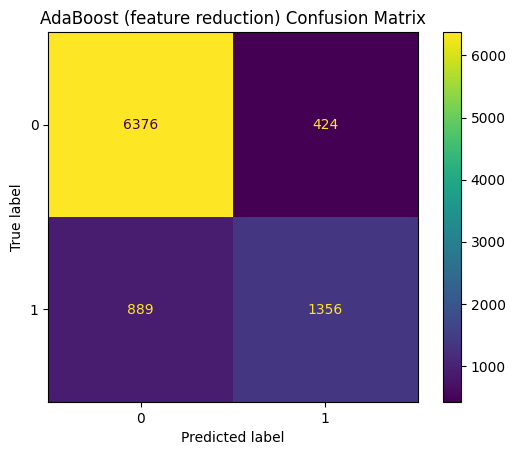

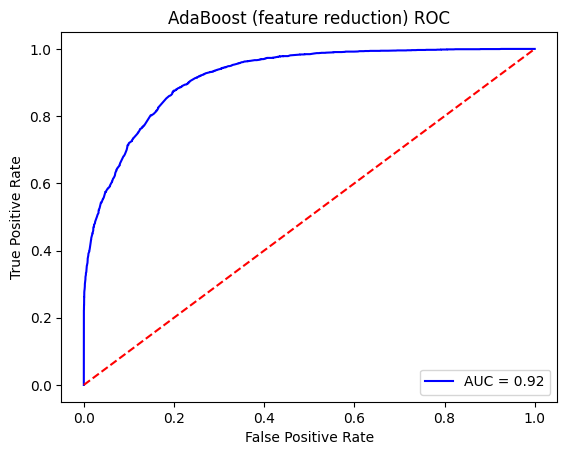

In [45]:
# calcolo della della ROC e della AUC

# probabilità previste per ciascuna classe per ciascun campione
y_prob = classificatore.predict_proba(X_test[AdaBoost_features])[:,1]
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)

# calcolo della confusion matrix
confusion_matrix = metrics.confusion_matrix(Y_test, y_test_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.title('AdaBoost (feature reduction) Confusion Matrix')
plt.show()

# Plot della confusion matrix e della ROC
plt.title('AdaBoost (feature reduction) ROC')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Differenza di accuracy

In [46]:
accuracy_metodi

{'SVM': 0.8057490326147042,
 'Decision Tree': 0.8540630182421227,
 'Random Forest': 0.8424543946932007,
 'AdaBoost': 0.861249309010503}

In [47]:
accuracy_metodi_ridotti

{'SVM': 0.844555002763958,
 'Decision Tree': 0.8564953012714207,
 'Random_Forest': 0.8371475953565506,
 'AdaBoost Tree': 0.8548369264787176}

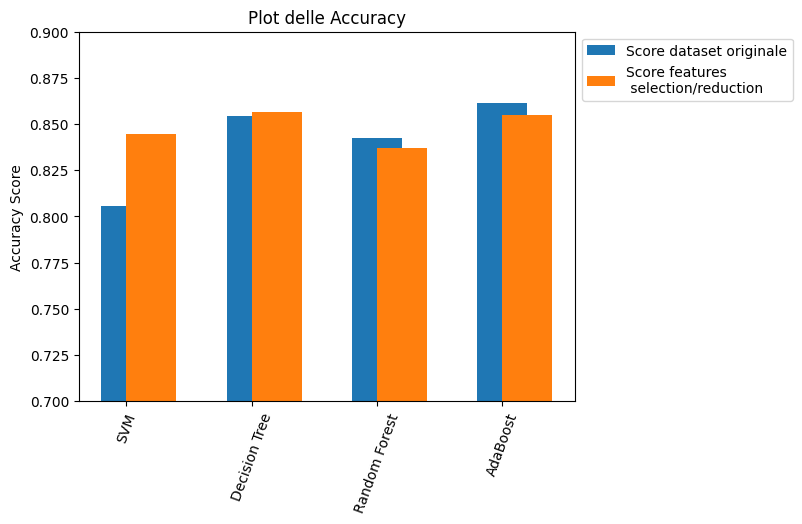

In [48]:
# estraggo i nomi dei metodi e le accuratezze
nome_classificatori = accuracy_metodi.keys()
score_originale = accuracy_metodi.values()
score_ridotto = accuracy_metodi_ridotti.values()

# Plot delle accuratezze dei metodi completi e ridotti
plt.set_cmap('tab10')
plt.bar(nome_classificatori, score_originale, width=0.4, align='center', label='Score dataset originale')
plt.bar(nome_classificatori, score_ridotto, width=0.4, align='edge', label='Score features \n selection/reduction')
plt.ylim(0.7, 0.9)
plt.ylabel('Accuracy Score')
plt.title('Plot delle Accuracy')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xticks(rotation=70)
plt.show()